In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = 9, 6
%load_ext autoreload
%autoreload 2

In [ ]:
%run autoencoder.py 64 1 0.25 --even --model_type gru --sigma 1e-9 --sim_type autoencoder/even/noise0 --embedding 8
#%run survey_lcs.py 64 1 0.25

In [3]:
model.layers

In [22]:
%%time
if args.even:
    encode = K.function([model.layers[0].input], [model.layers[args.num_layers].output])
    encoding, = encode([X[:]])
else:
    encode = K.function([model.layers[0].input, model.layers[args.num_layers + 1].input],
                        [model.layers[args.num_layers].output])
    encoding, = encode([X[:], X[:, :, [0, 2]]])
#   encoding_asas = encode([X_asas, X_asas[:, :, [0, 2]]])[0]

CPU times: user 21.5 s, sys: 6.55 s, total: 28.1 s
Wall time: 6.52 s


In [ ]:
i = -1

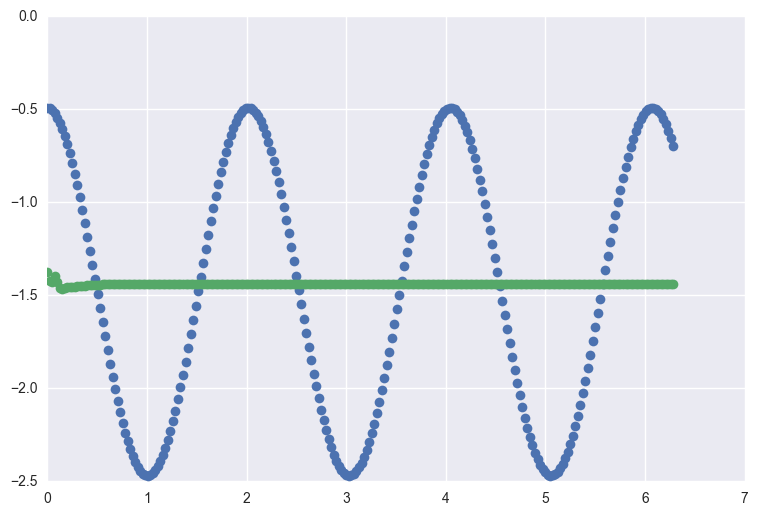

In [38]:
i += 1
if args.even:
    t = np.linspace(0, 2 * np.pi, X.shape[1])
    m = X[i, :, 0]
    pred_i = model.predict(X[[i]])[0, :, 0]
else:
    inds = (X[i, :, -1] >= 0.)
    t = X[i, inds, 0]
    m = X[i, inds, 1]
    e = X[i, inds, 2]
    #plt.plot(t, m, 'o')
    plt.errorbar(t, m, e, None, 'o')
    pred_i = model.predict({'main_input': X[i:i+1], 'aux_input': X[i:i+1, :, [0, 2]]})[0, inds, 0]

plt.plot(t, m, 'o')
plt.plot(t, pred_i, 'o')

#w_r, A_r, phi_r, b_r = pred_gru[i]
#x_r = A_r * np.sin(2 * np.pi * w_r * t + phi_r) + b_r
#plt.plot(t, x_r, '--')

#plt.legend(['Noisy', 'Original'])

In [39]:
np.mean((m - pred_i) ** 2)

0.5011764844510519

          0         1         2         3
0  0.013136 -0.004261 -0.025072 -0.303748
1 -0.014968 -0.010690 -0.013447  0.925387
2 -0.002112  0.023548 -0.014686  0.904713
3 -0.005690 -0.020575 -0.026981  0.616294
4  0.000304  0.009140  0.000556  0.992231
5 -0.002992  0.035395 -0.007011  0.955980
6  0.007106  0.032432 -0.015890  0.881359
7 -0.010726 -0.024845 -0.022430 -0.700113


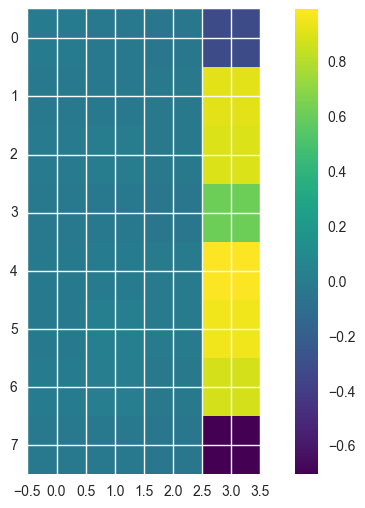

In [16]:
S = np.corrcoef(encoding, Y[:encoding.shape[0]], rowvar=0)[:8, 8:]
print(pd.DataFrame(S))
plt.imshow(S, cmap='viridis', interpolation='none')
plt.colorbar()

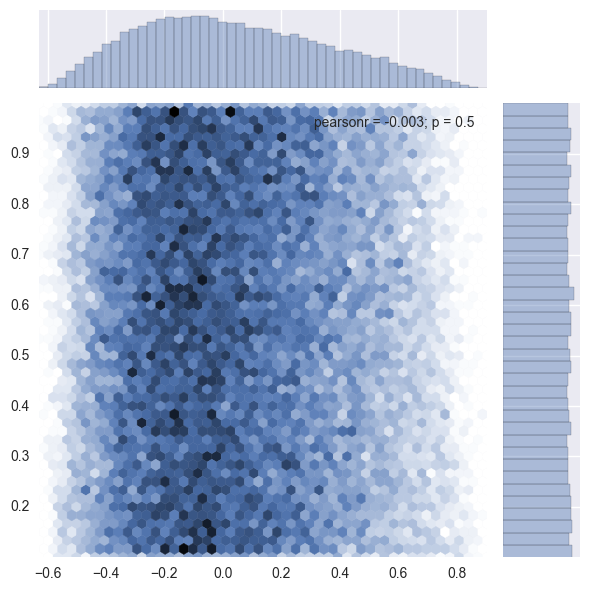

In [17]:
sns.jointplot(encoding[:, 5], Y[:encoding.shape[0], 0], kind='hex')

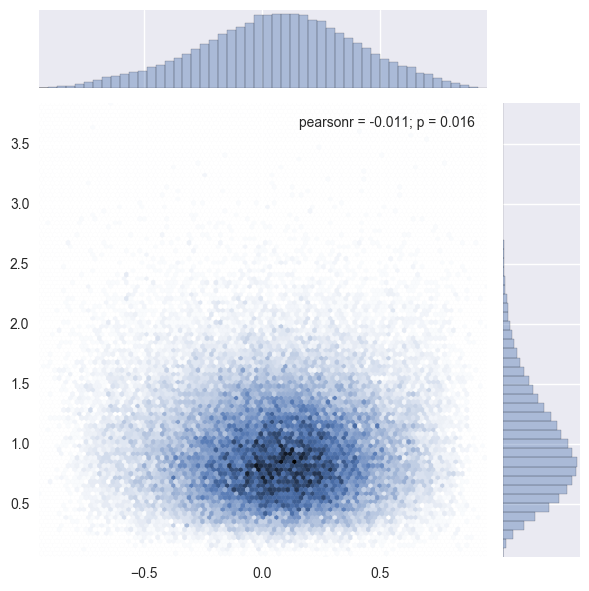

In [18]:
sns.jointplot(encoding[:, 1], Y[:encoding.shape[0], 1], kind='hex')

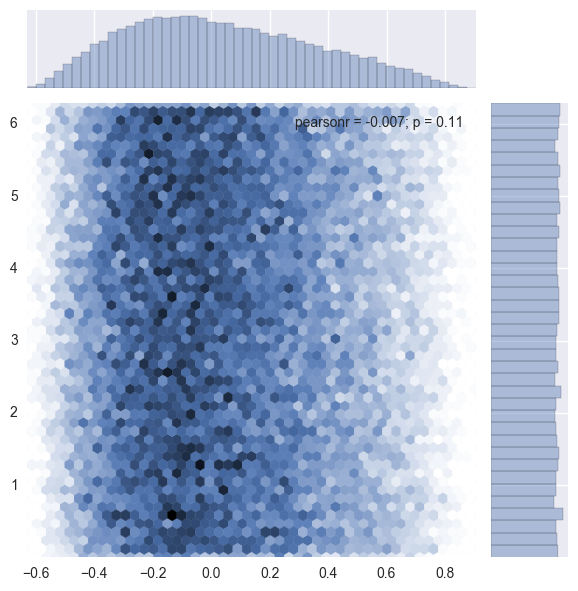

In [19]:
sns.jointplot(encoding[:, 5], Y[:encoding.shape[0], 2], kind='hex')

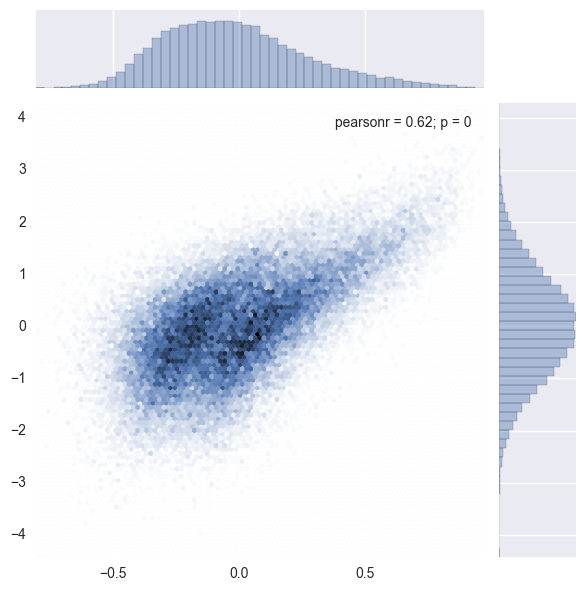

In [20]:
sns.jointplot(encoding[:, 3], Y[:encoding.shape[0], 3], kind='hex')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

model = RandomForestRegressor(n_estimators=128)
#model = ElasticNet()
#model = SVR(kernel='rbf')

model.fit(encoding, Y[:encoding.shape[0], 0])

In [ ]:
encoding_test = encode([X[test]])[0]
Y_pred = model.predict(encoding_test)

In [ ]:
#sns.jointplot(Y[test, 0], Y_pred[:, 0])
sns.jointplot(Y[test, 0], Y_pred)